#1

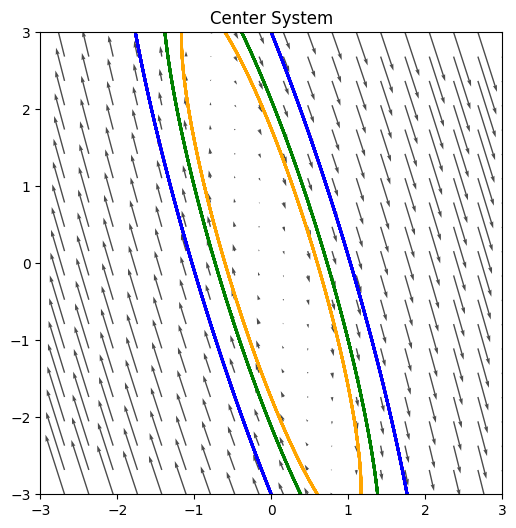

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# System matrix
A = np.array([[5, 2], [-17, -5]])

x = np.linspace(-3, 3, 20)
y = np.linspace(-3, 3, 20)
X, Y = np.meshgrid(x, y)

U = A[0,0]*X + A[0,1]*Y
V = A[1,0]*X + A[1,1]*Y

plt.figure(figsize=(8, 6))
plt.quiver(X, Y, U, V, scale=470, alpha=0.7)

# Trajectory function
def trajectory(t, C1, C2):
    x_t = 2 * (C1 * np.cos(3*t) + C2 * np.sin(3*t))
    y_t = (-5*C1 + 3*C2) * np.cos(3*t) + (-3*C1 - 5*C2) * np.sin(3*t)
    return x_t, y_t

# Time array
t = np.linspace(0, 4*np.pi, 1000)

# 4 trajectories
coefficients = [[1, 0], [0, 1], [0.5, 0.5], [-0.5, 0.3]]
colors = ['red', 'blue', 'green', 'orange']

for i, (C1, C2) in enumerate(coefficients):
    x_t, y_t = trajectory(t, C1, C2)
    plt.plot(x_t, y_t, color=colors[i], linewidth=2)

plt.xlim(-3, 3); plt.ylim(-3, 3)
plt.gca().set_aspect('equal')
plt.title('Center System')
plt.show()

#2

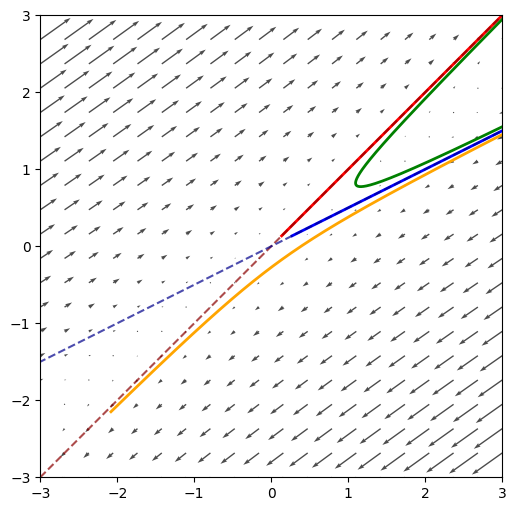

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[-3, 4], [-2, 3]])

x = np.linspace(-3, 3, 20)
y = np.linspace(-3, 3, 20)
X, Y = np.meshgrid(x, y)

U = A[0,0]*X + A[0,1]*Y
V = A[1,0]*X + A[1,1]*Y

plt.figure(figsize=(8, 6))
plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=50, alpha=0.7)

def analytical_trajectory(t, C1, C2):
    x_t = C1 * np.exp(t) + 2 * C2 * np.exp(-t)
    y_t = C1 * np.exp(t) + C2 * np.exp(-t)
    return x_t, y_t

t_forward = np.linspace(0, 2, 200)
t_backward = np.linspace(0, -2, 200)

coefficients = [
    [1, 0],
    [0, 1],
    [0.5, 0.3],
    [-0.3, 0.5]
]

colors = ['red', 'blue', 'green', 'orange']

for i, (C1, C2) in enumerate(coefficients):
    x_forward, y_forward = analytical_trajectory(t_forward, C1, C2)
    x_backward, y_backward = analytical_trajectory(t_backward, C1, C2)

    x_full = np.concatenate([x_backward[::-1], x_forward])
    y_full = np.concatenate([y_backward[::-1], y_forward])

    plt.plot(x_full, y_full, color=colors[i], linewidth=2)

# Plot eigenvectors
L = np.linspace(-3, 3, 100)
v1 = np.array([1, 1])   # Eigenvector for λ=1 (unstable)
v2 = np.array([2, 1])   # Eigenvector for λ=-1 (stable)

# Unstable manifold
pts_unstable = np.outer(L, v1)
plt.plot(pts_unstable[:, 0], pts_unstable[:, 1], '--', color='darkred', linewidth=1.5, alpha=0.7)

# Stable manifold
pts_stable = np.outer(L, v2)
plt.plot(pts_stable[:, 0], pts_stable[:, 1], '--', color='darkblue', linewidth=1.5, alpha=0.7)

plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.gca().set_aspect('equal')
plt.show()

#3

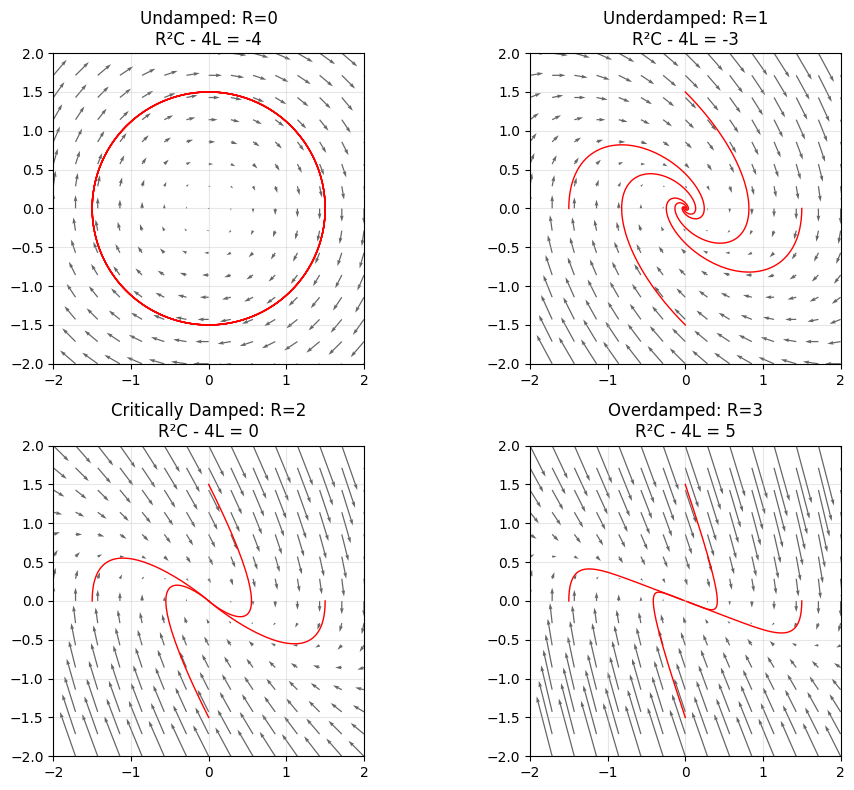

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# System matrix for LRC circuit
def lrc_system(R, L, C):
    return np.array([[0, 1], [-1/(L*C), -R/L]])

# Create the four damping cases
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
L, C = 1, 1
cases = [(0, "Undamped"), (1, "Underdamped"), (2, "Critically Damped"), (3, "Overdamped")]

for i, (R, name) in enumerate(cases):
    row, col = i // 2, i % 2
    ax = axes[row, col]
    A = lrc_system(R, L, C)

    # Calculate discriminant
    discriminant = R**2 * C - 4*L

    # Vector field
    x, y = np.linspace(-2, 2, 15), np.linspace(-2, 2, 15)
    X, Y = np.meshgrid(x, y)
    U, V = A[0,0]*X + A[0,1]*Y, A[1,0]*X + A[1,1]*Y
    ax.quiver(X, Y, U, V, scale=40, alpha=0.6)

    # Trajectories
    def system(t, z): return A @ z
    for ic in [[1.5, 0], [0, 1.5], [-1.5, 0], [0, -1.5]]:
        sol = solve_ivp(system, (0, 10), ic, t_eval=np.linspace(0, 10, 200))
        ax.plot(sol.y[0], sol.y[1], 'red', linewidth=1)


    ax.set_xlim(-2, 2); ax.set_ylim(-2, 2)
    ax.set_aspect('equal')
    ax.set_title(f'{name}: R={R}\nR²C - 4L = {discriminant}')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#4

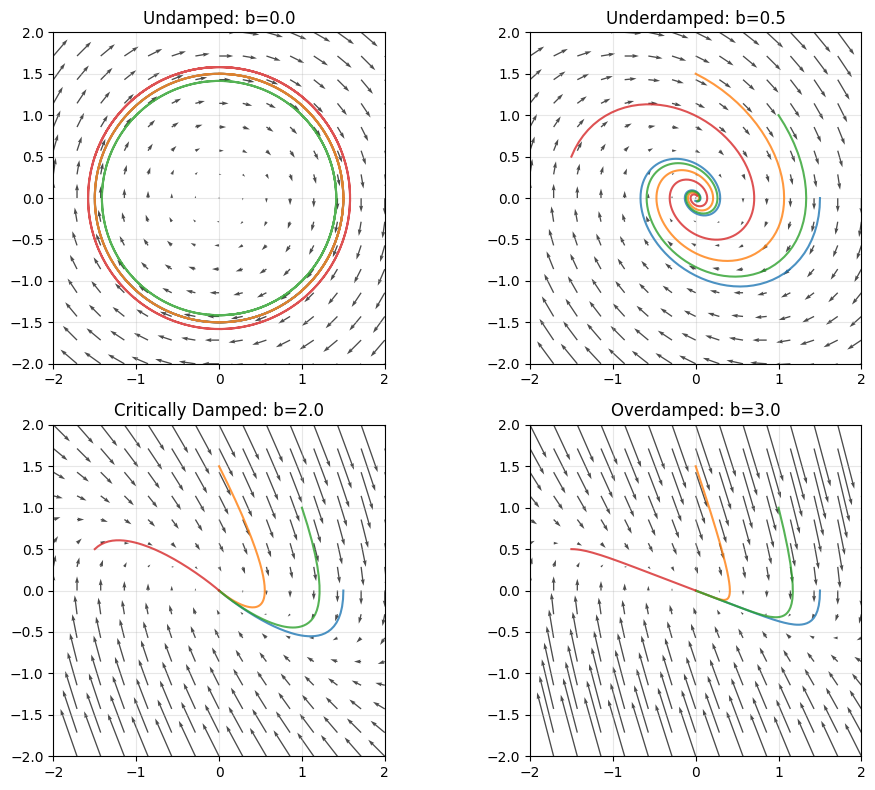

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# System matrix for damped harmonic oscillator
def harmonic_system(m, b, k):
    return np.array([[0, 1], [-k/m, -b/m]])

# Create the four damping cases
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
m, k = 1.0, 1.0
cases = [(0.0, "Undamped"), (0.5, "Underdamped"), (2.0, "Critically Damped"), (3.0, "Overdamped")]

for i, (b, name) in enumerate(cases):
    row, col = i // 2, i % 2
    ax = axes[row, col]
    A = harmonic_system(m, b, k)

    # Vector field
    x, y = np.linspace(-2, 2, 15), np.linspace(-2, 2, 15)
    X, Y = np.meshgrid(x, y)
    U, V = A[0,0]*X + A[0,1]*Y, A[1,0]*X + A[1,1]*Y
    ax.quiver(X, Y, U, V, scale=40, alpha=0.7)

    # Trajectories
    def system(t, z): return A @ z
    for ic in [[1.5, 0], [0, 1.5], [1, 1], [-1.5, 0.5]]:
        sol = solve_ivp(system, (0, 15), ic, t_eval=np.linspace(0, 15, 200))
        ax.plot(sol.y[0], sol.y[1], linewidth=1.5, alpha=0.8)

    ax.set_xlim(-2, 2); ax.set_ylim(-2, 2)
    ax.set_aspect('equal')
    ax.set_title(f'{name}: b={b}')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()